In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load from csv
df = pd.read_csv("sample.csv")

# change path
X = df.iloc[:, :-1].values

# All columns except last → Features
y = df.iloc[:, -1].values

# Last column only → Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# KNN model
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions & accuracy
y_pred = knn.predict(X_test)
accuracy =accuracy_score(y_test, y_pred)

print(f"Accuracy (CSV iris) with k={k}: {accuracy:.2f}")

Accuracy (CSV iris) with k=3: 0.34


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of k-NN with k={k}: {accuracy:.2f}')

# Minimal addition: print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy of k-NN with k=3: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy (CSV sample) with k=3: 0.34

Confusion Matrix:
            setosa  versicolor  virginica
setosa         163          87         79
versicolor     148          91         90
virginica      182          78         82


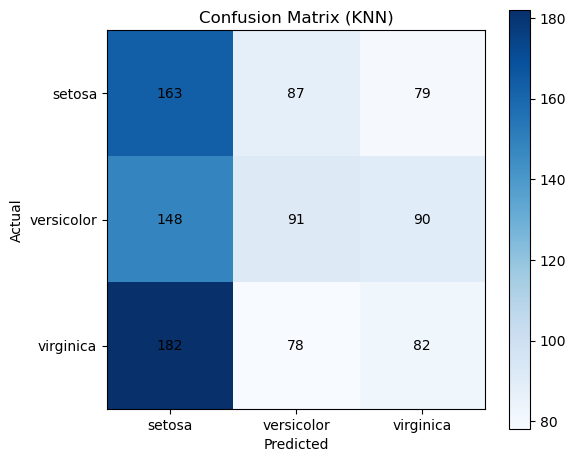

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("sample.csv")   # change path if needed

# Features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (CSV sample) with k={k}: {accuracy:.2f}")

# Confusion Matrix
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)

print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="Blues")

# Show labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix (KNN)")

# Add values inside boxes
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar(im)
plt.tight_layout()
plt.show()
